In [82]:
pip install -U seaborn

Note: you may need to restart the kernel to use updated packages.


In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [84]:
data = pd.read_csv("train.csv")

In [85]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

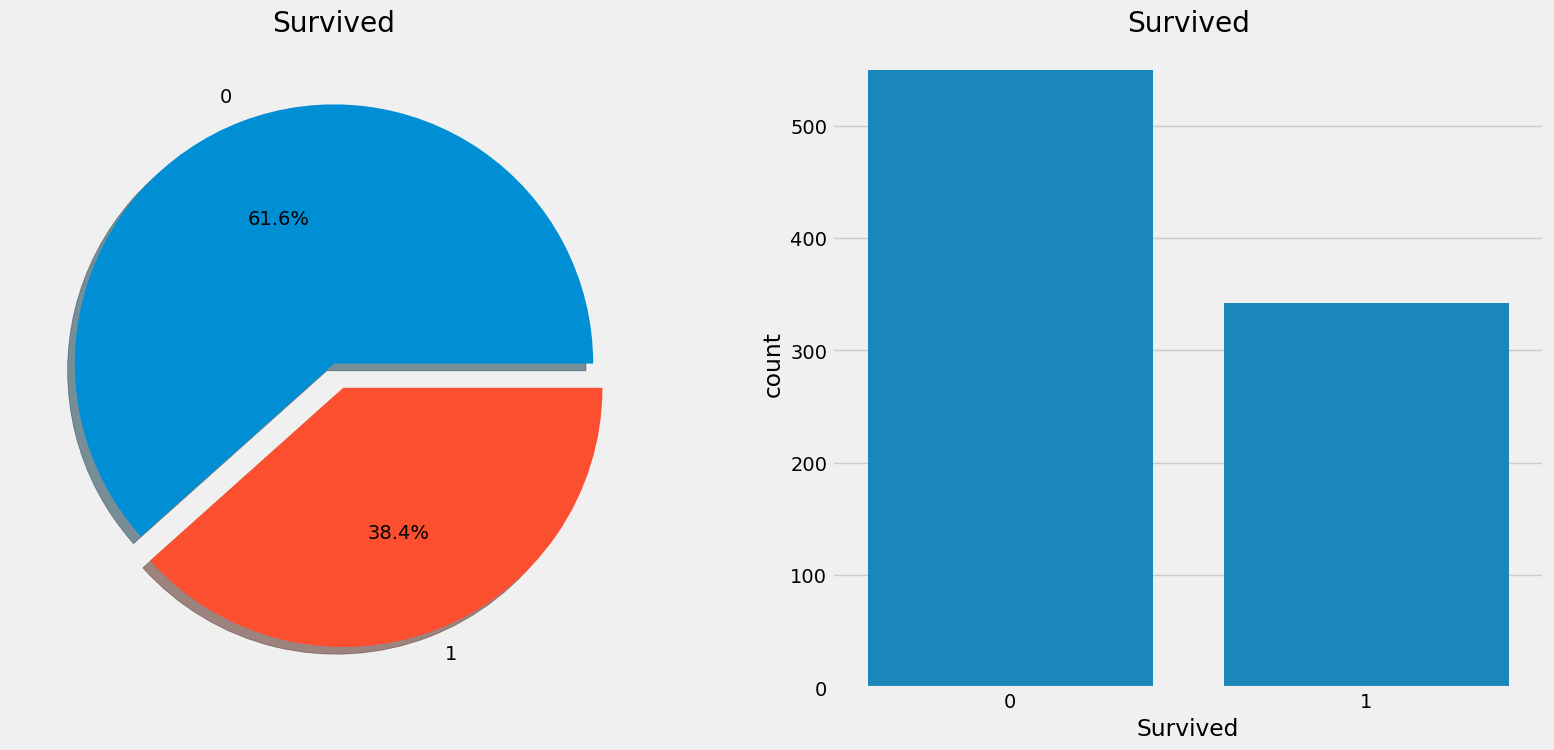

In [87]:
f,ax = plt.subplots(1,2,figsize=(18,8))
#autopct='%1.1f%%'は少数第一位まで表示、%1.2f%%は少数第2位まで表示
data["Survived"].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title("Survived")
ax[0].set_ylabel("")
sns.countplot(x="Survived",data=data,ax=ax[1])
ax[1].set_title("Survived")
plt.show()

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [89]:
data.groupby(["Sex","Survived"])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

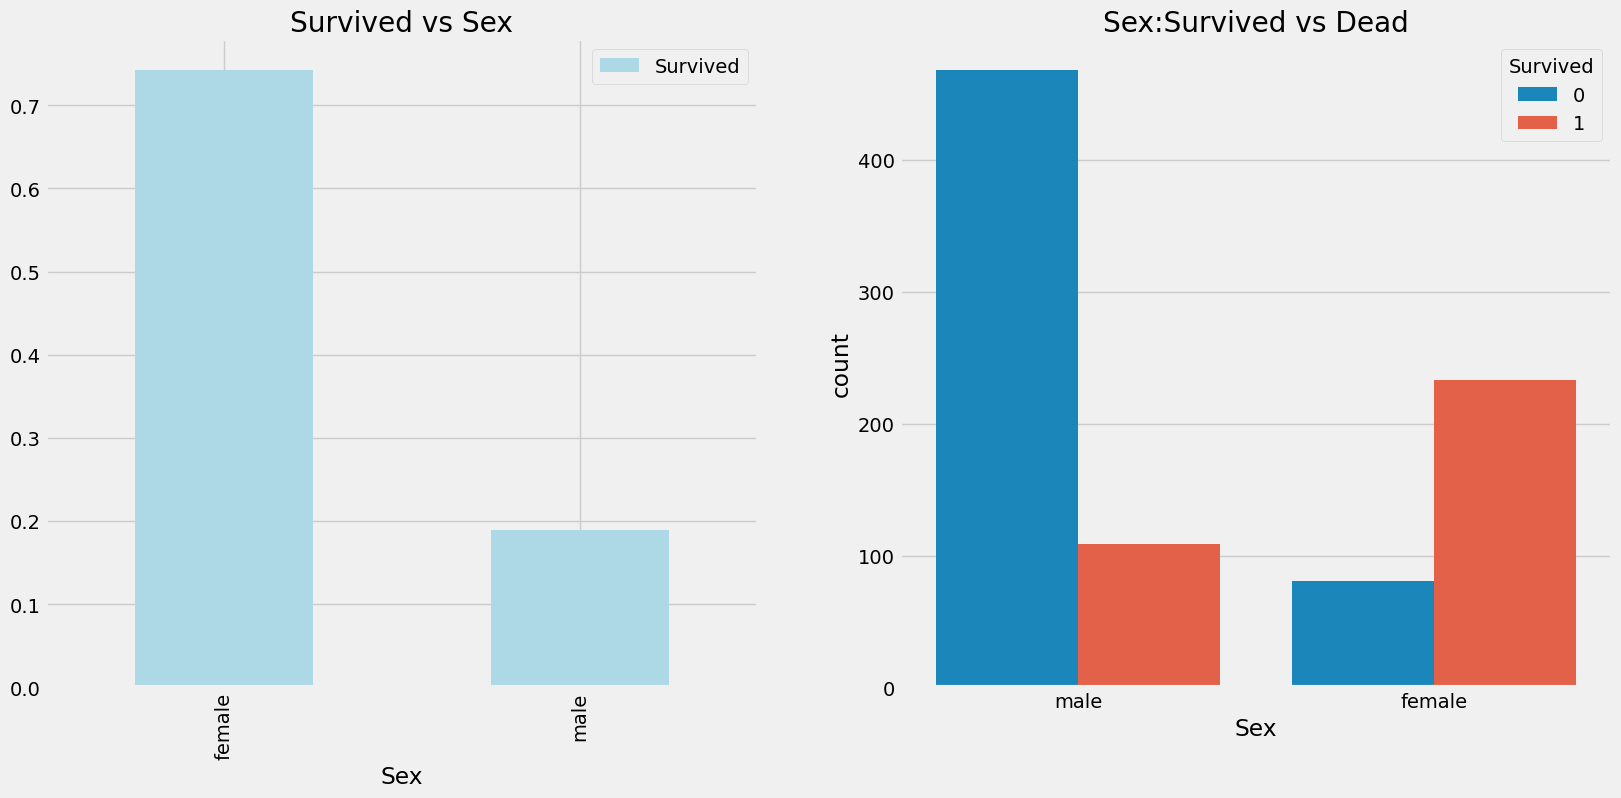

In [90]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0],color='lightblue')
ax[0].set_title("Survived vs Sex")
sns.countplot(x='Sex',hue=data['Survived'].astype(str),data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [91]:
#クロス集計
pd.crosstab(data["Pclass"],data["Survived"],
            margins=True).style.background_gradient(cmap='summer_r')#_rで反転

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


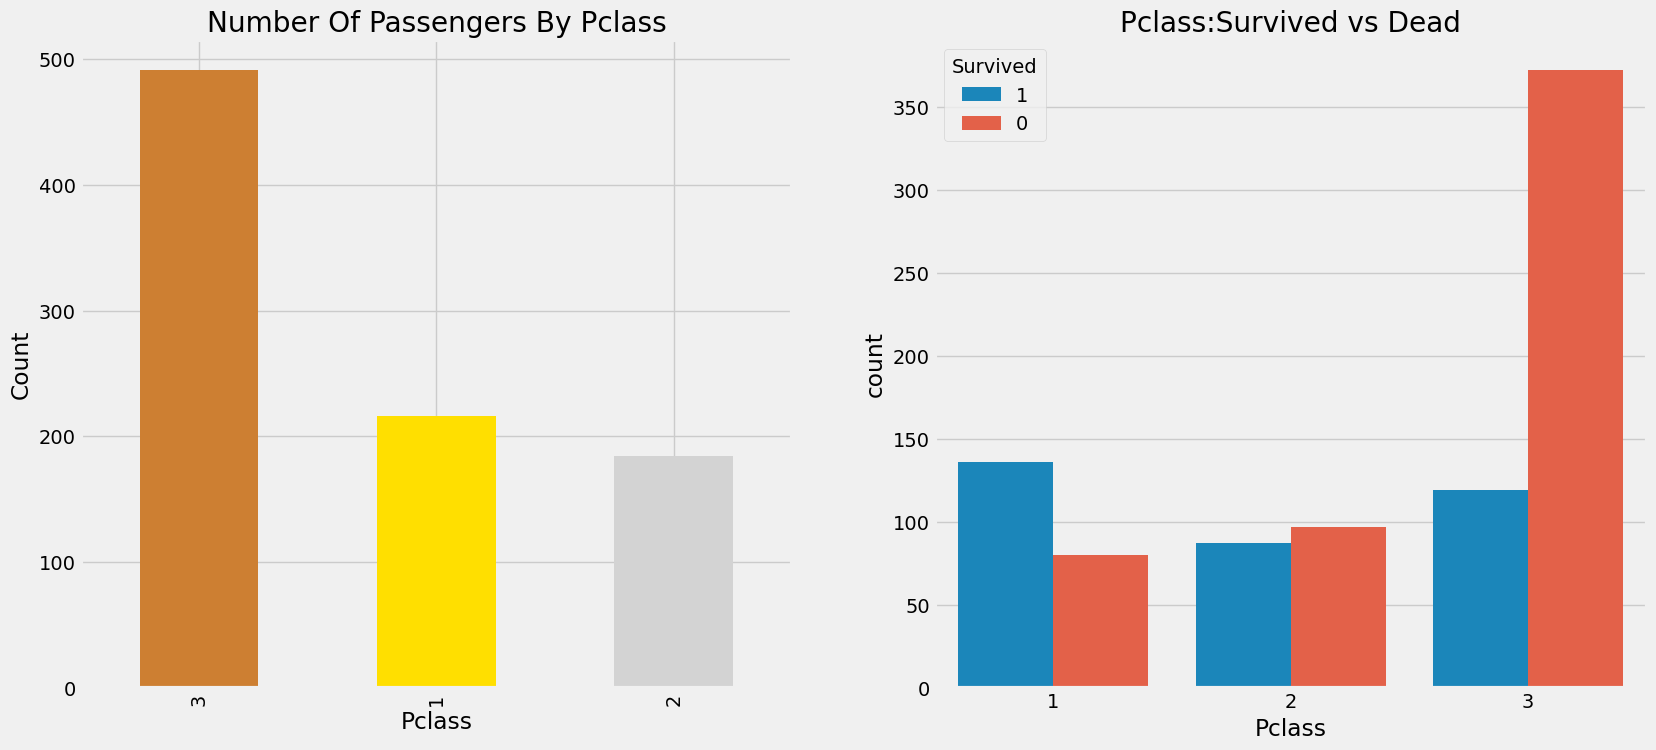

In [92]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue=data['Survived'].astype(str),data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [93]:
pd.crosstab([data['Sex'],data['Survived']],data['Pclass'],margins=True).style.background_gradient(cmap='summer_r')

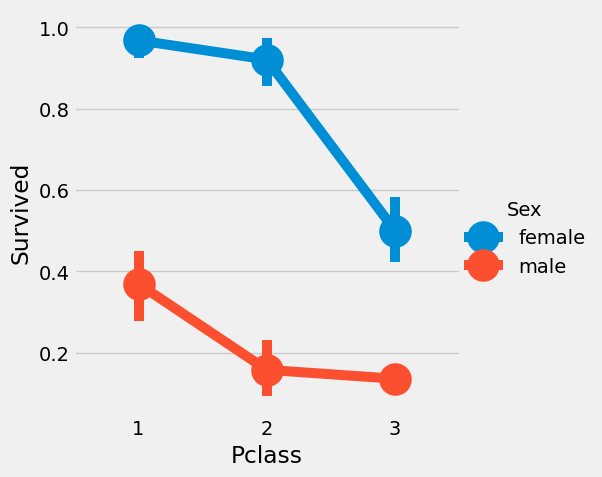

In [94]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='point', data=data)
#kindの変数としてpoint,bar,count,box,violin,strip,swarmなどがある

In [95]:
print('Oldest Passenger:',data['Age'].max(),'Years')
print('Youngest Passenger:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger: 80.0 Years
Youngest Passenger: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


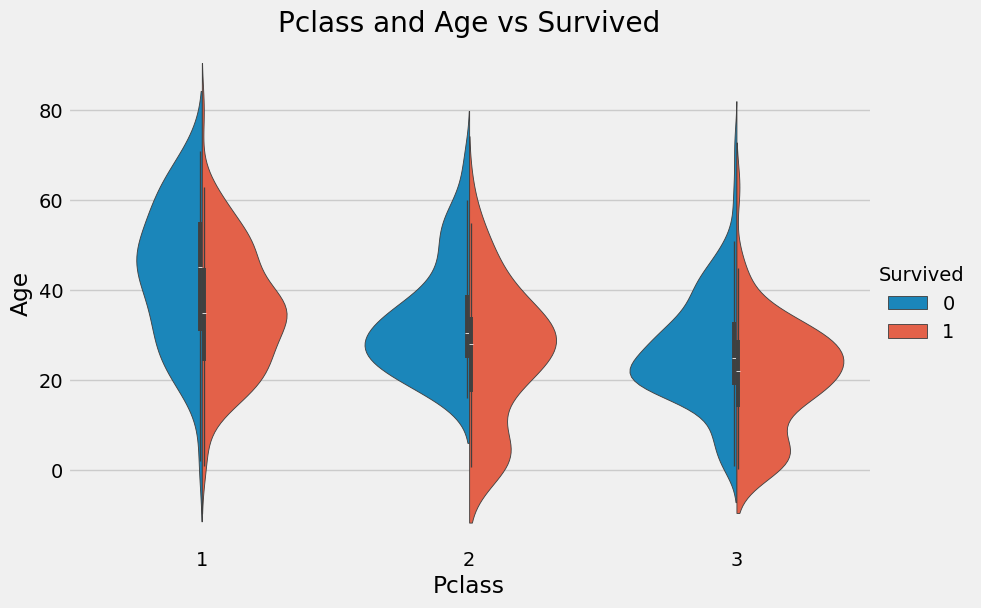

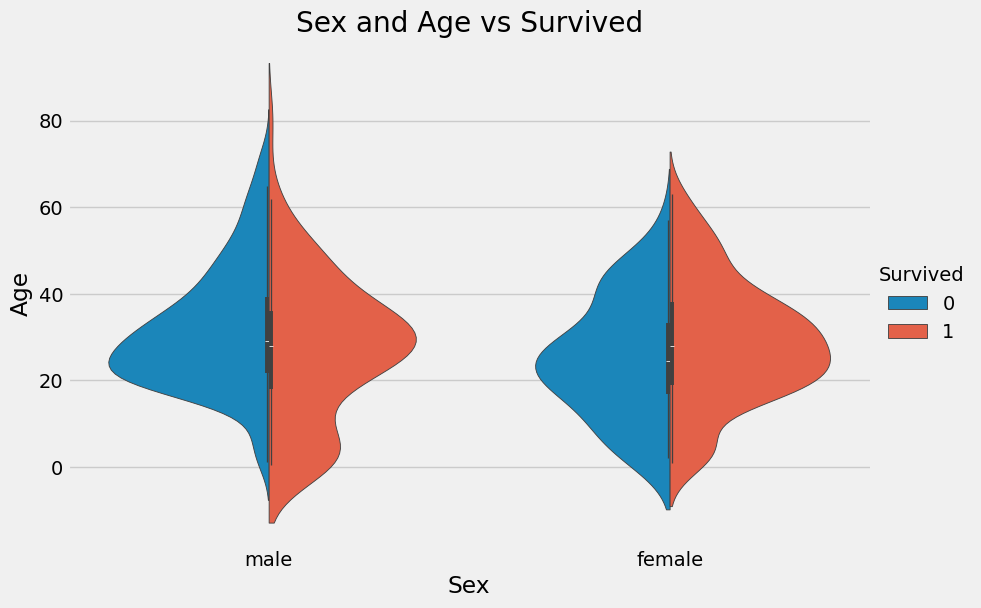

In [96]:
from IPython.display import display

g1 = sns.catplot(x='Pclass',y='Age',hue='Survived',kind='violin',data=data,split=True,
                 height=6,aspect=1.5)
g1.set(title='Pclass and Age vs Survived')
g2 = sns.catplot(x='Sex',y='Age',hue='Survived',kind='violin',data=data,split=True,
                 height=6,aspect=1.5)
g2.set(title='Sex and Age vs Survived')

display(g1)
display(g2)

In [97]:
data['Initial'] = data['Name'].str.extract(r'([A-Za-z]+)\.')

In [98]:
display(data['Initial'].head(10))

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Initial, dtype: object

In [99]:
pd.crosstab(data['Initial'],data['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [100]:
data['Initial']= data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'])

In [101]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [102]:
data.loc[(data['Age'].isnull()&(data['Initial']=='Mr'),'Age')]=33
data.loc[(data['Age'].isnull()&(data['Initial']=='Mrs'),'Age')]=36
data.loc[(data['Age'].isnull()&(data['Initial']=='Master'),'Age')]=5
data.loc[(data['Age'].isnull()&(data['Initial']=='Miss'),'Age')]=22
data.loc[(data['Age'].isnull()&(data['Initial']=='Other'),'Age')]=46

In [103]:
data['Age'].isnull().any()

False

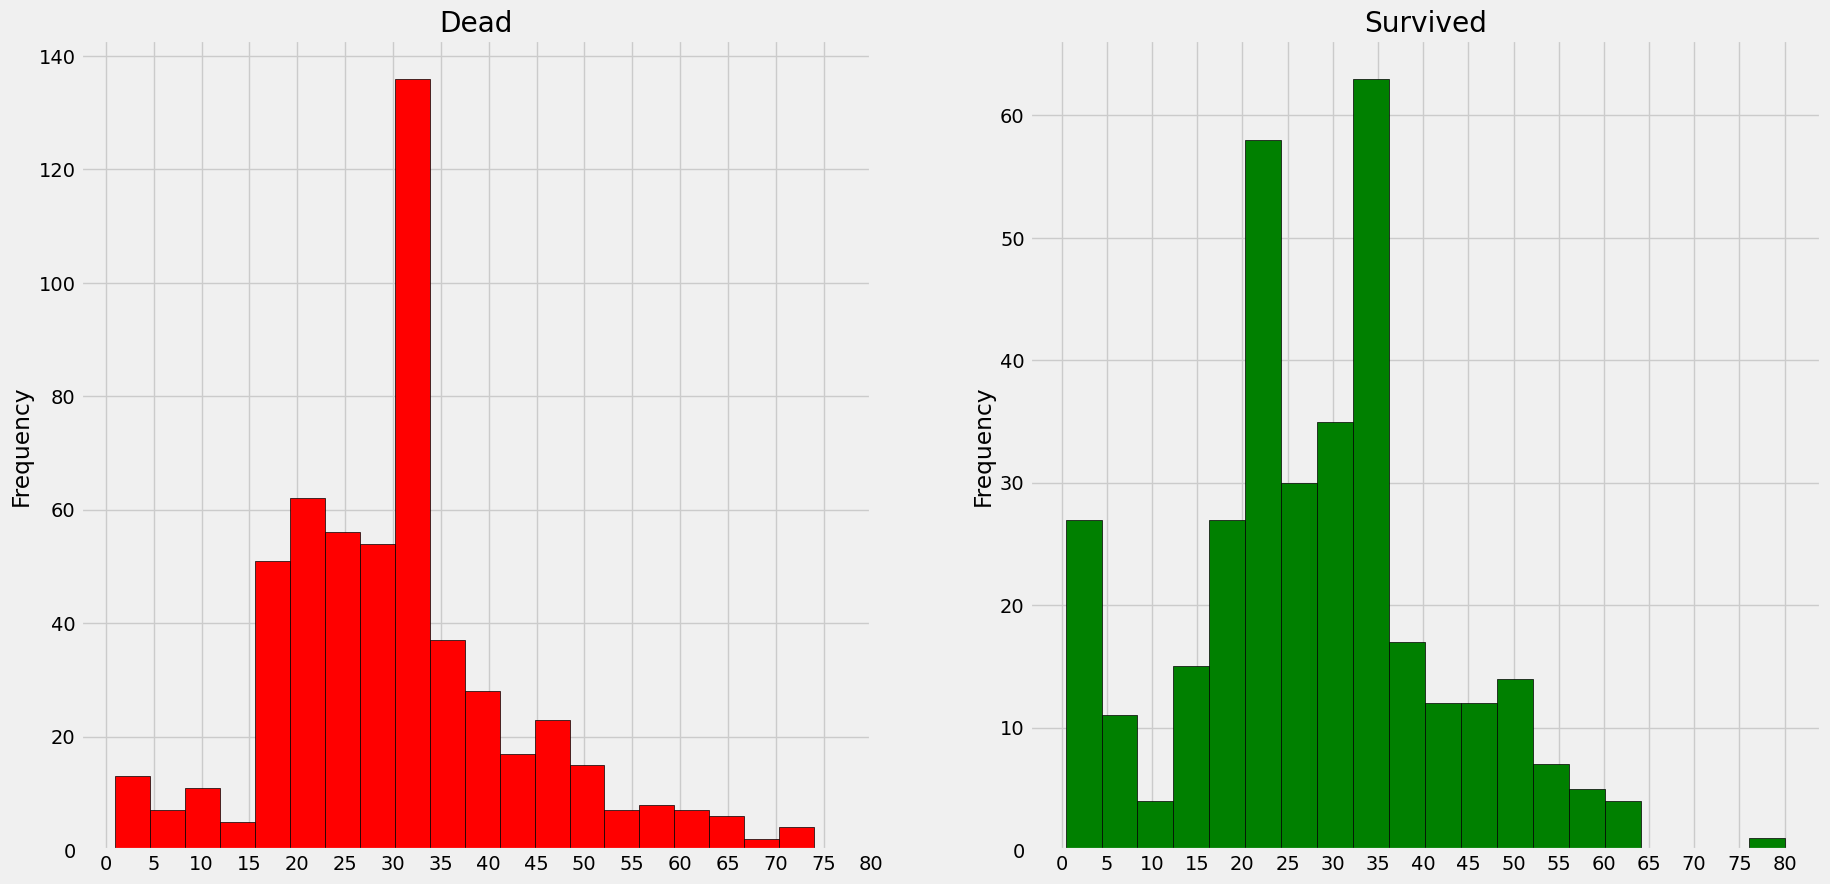

In [104]:
f,ax = plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Dead')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived')
x2 = list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

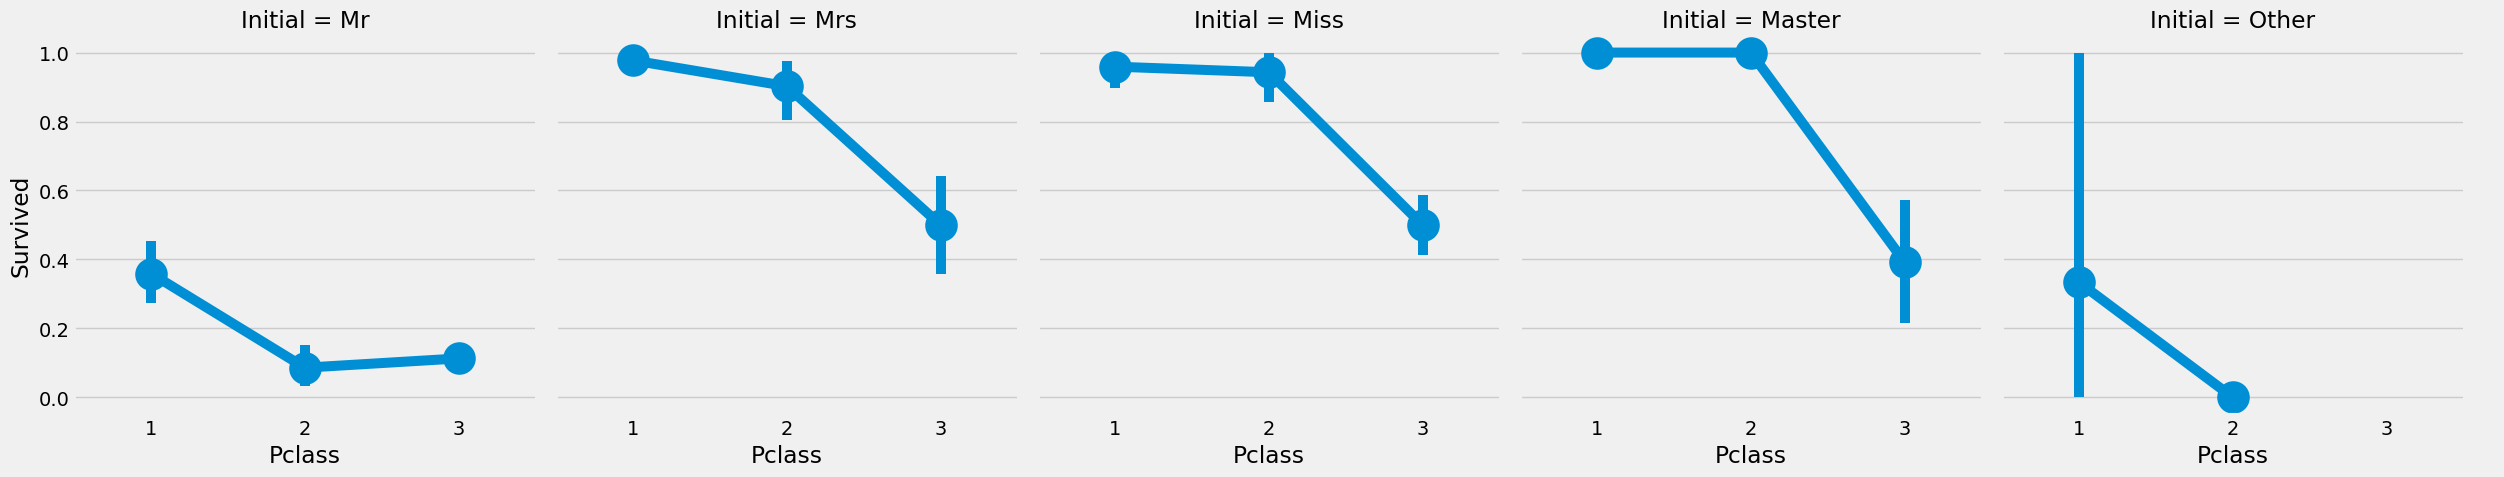

In [105]:
sns.catplot(x='Pclass',y='Survived',col='Initial',data=data,kind='point')
plt.show()

In [106]:
pd.crosstab([data['Embarked'],data['Pclass']],
            [data['Sex'],data['Survived']],margins=True).style.background_gradient(cmap='summer_r')

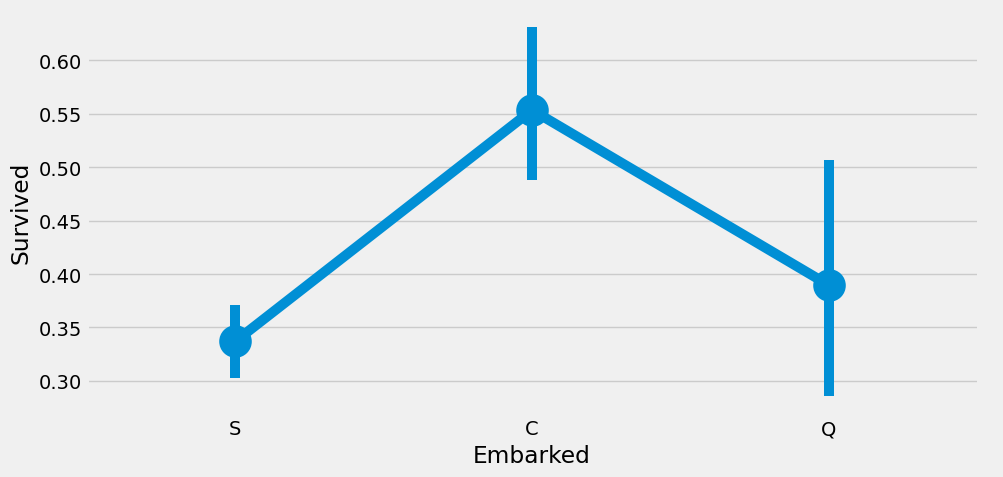

In [107]:
sns.catplot(x='Embarked',y='Survived',data=data,kind='point',height=5,aspect=2)
plt.show()

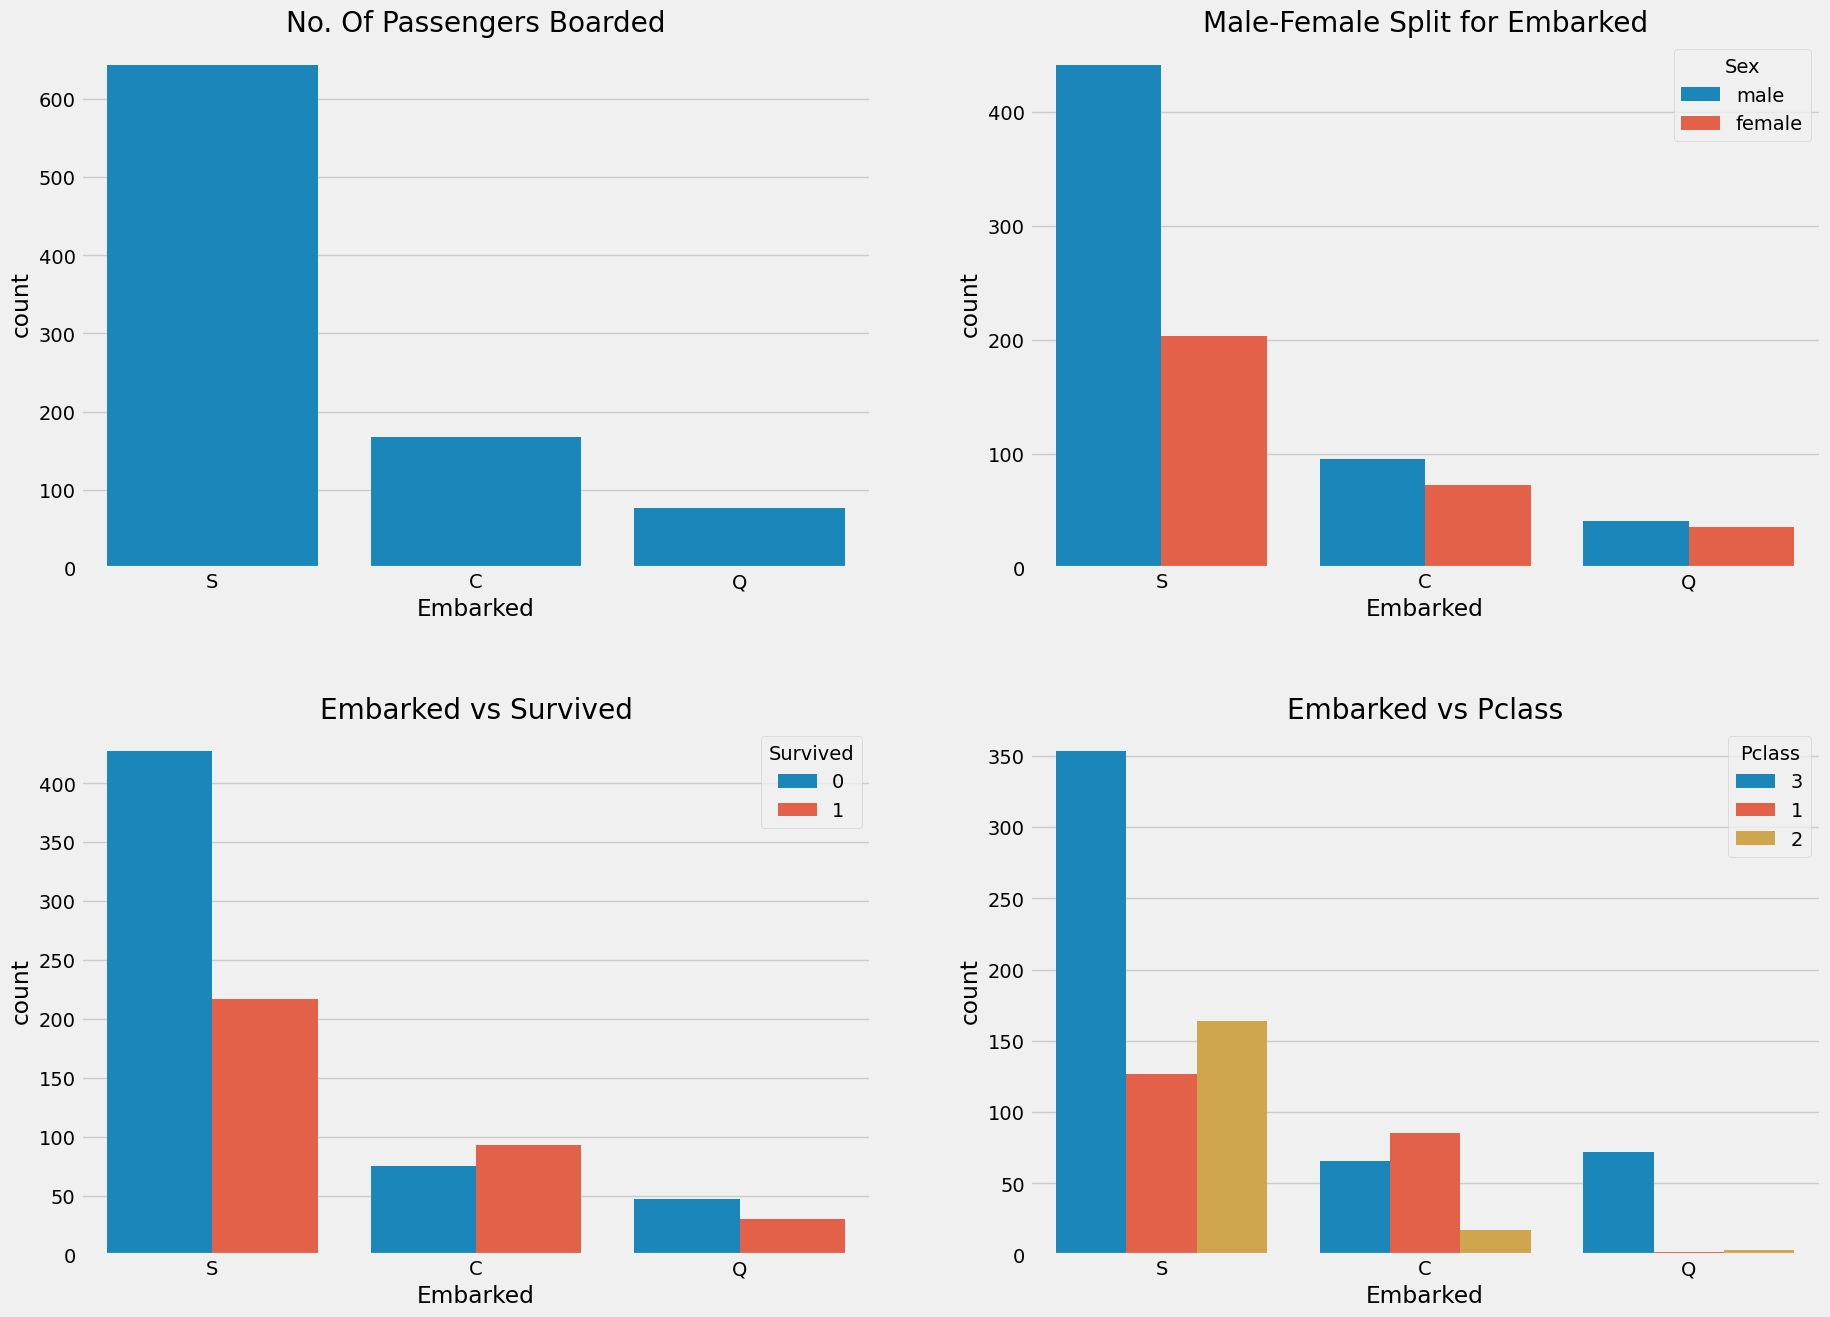

In [108]:
f,ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(x='Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x='Embarked',hue=data['Survived'].astype(str),data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x='Embarked',hue=data['Pclass'].astype(str),data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
#複数のグラフの間を調整してる
plt.subplots_adjust(wspace=0.2,hspace=0.3)
plt.show()

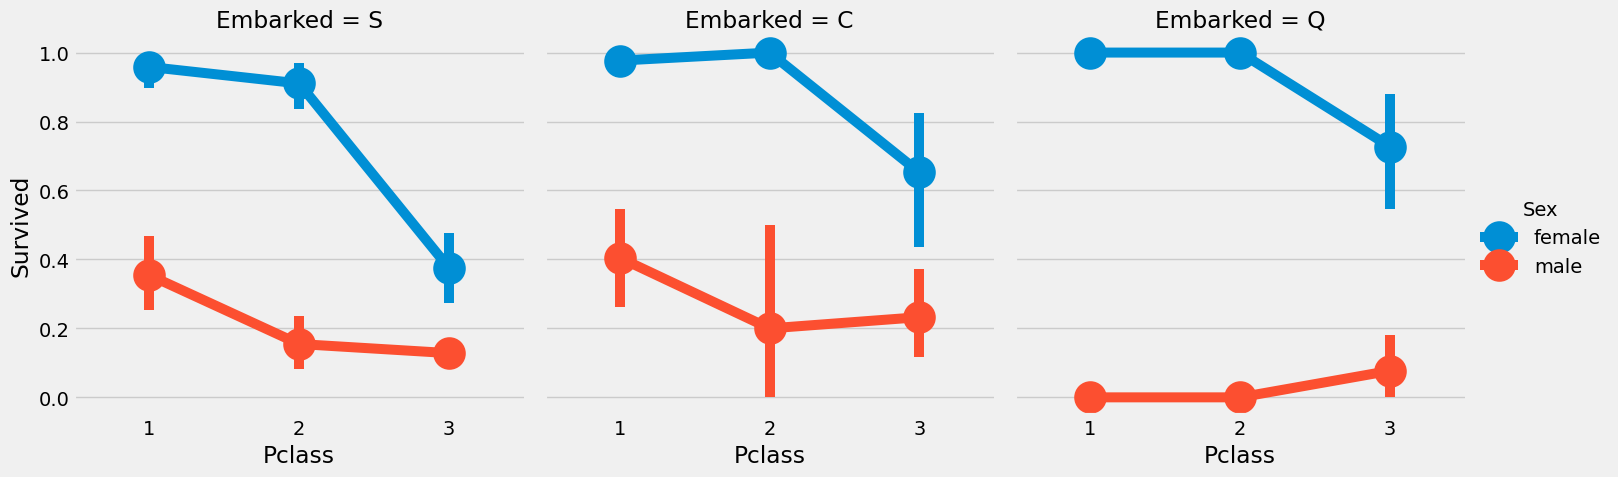

In [109]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',col='Embarked',data=data,kind='point')
plt.show()

In [110]:
data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
Initial        891
dtype: int64

In [111]:
data['Embarked'].fillna('S',inplace=True)

In [112]:
data.Embarked.isnull().sum()

0

In [113]:
pd.crosstab(data['SibSp'],data['Survived']).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


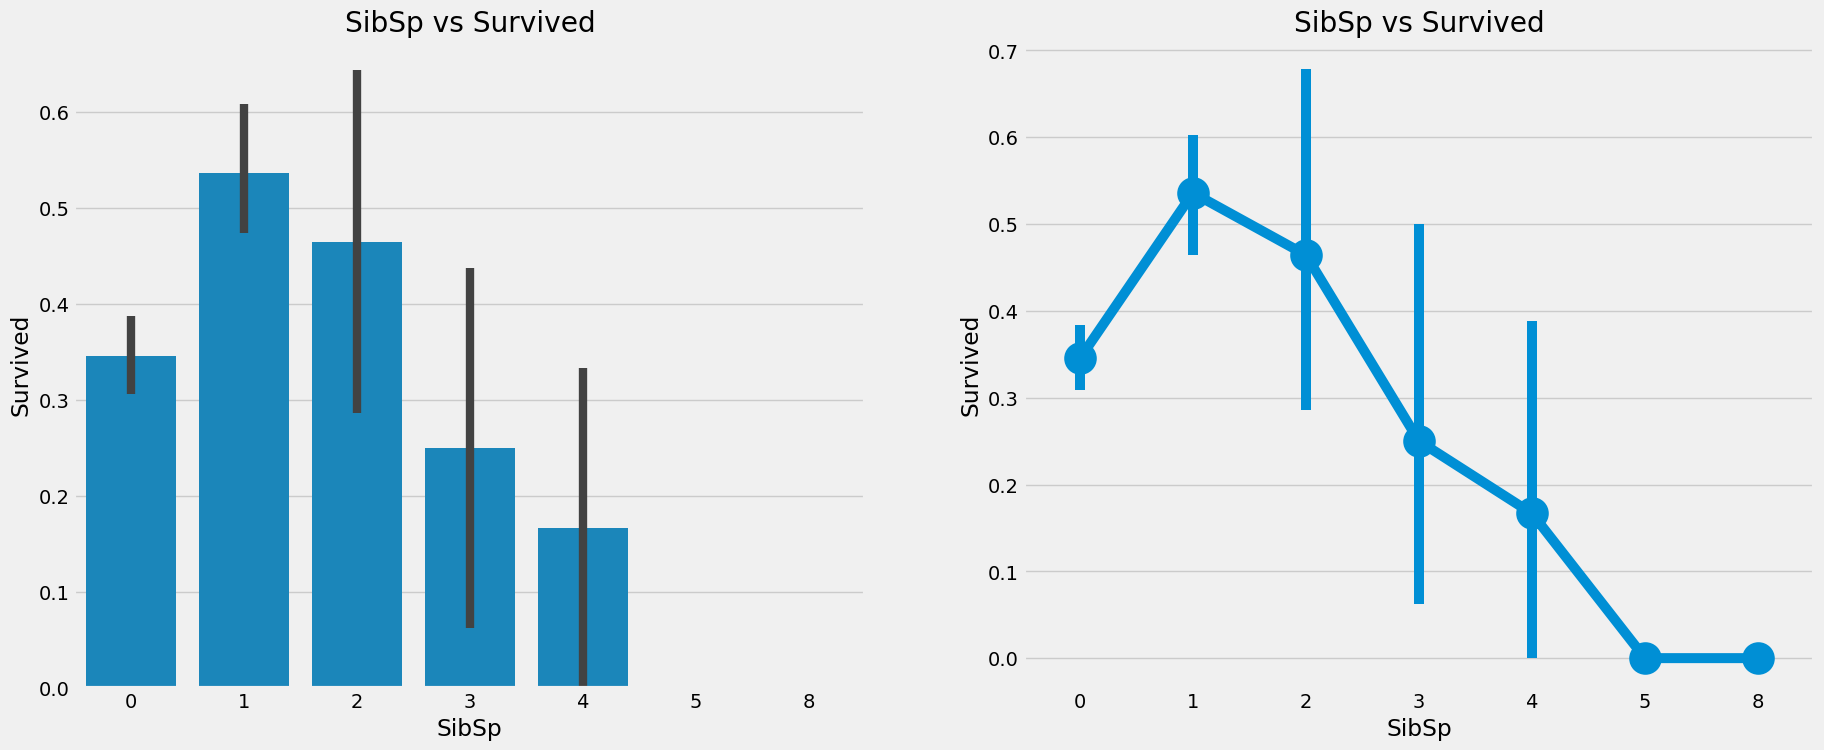

In [114]:
f,ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='SibSp',y='Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.pointplot(x='SibSp',y='Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [115]:
pd.crosstab(data['SibSp'],data['Pclass']).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [116]:
pd.crosstab(data['Parch'],data['Pclass']).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


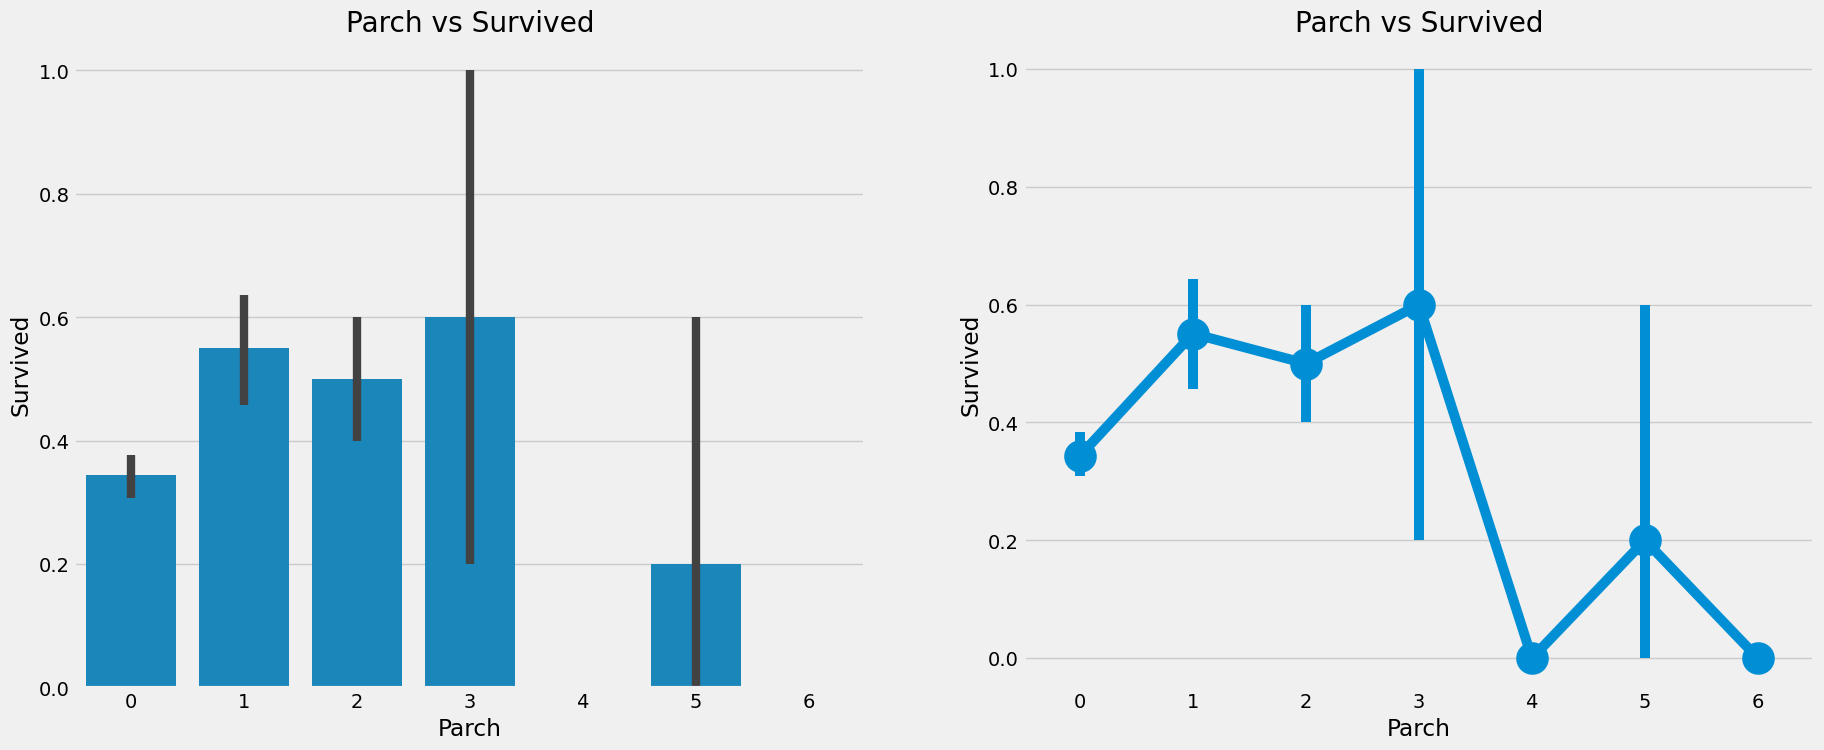

In [117]:
f,ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='Parch',y='Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.pointplot(x='Parch',y='Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

In [118]:
print('Highest Fare was:',data['Fare'].max())
print('Loewst Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Loewst Fare was: 0.0
Average Fare was: 32.204207968574636


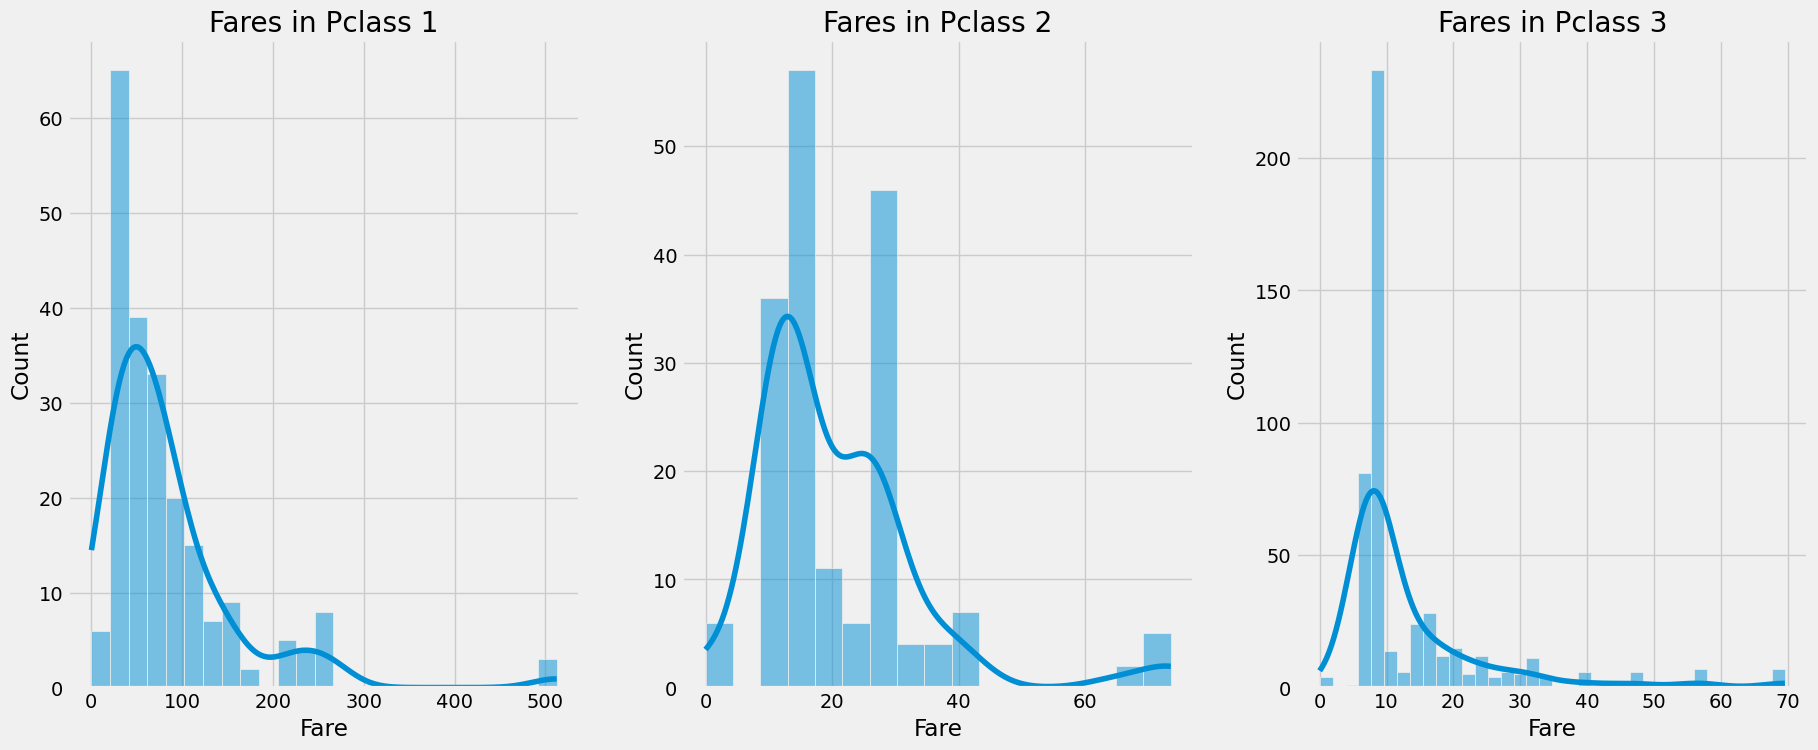

In [119]:
f,ax = plt.subplots(1,3,figsize=(20,8))
sns.histplot(data[data['Pclass']==1],x='Fare',kde=True,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.histplot(data[data['Pclass']==2],x='Fare',kde=True,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.histplot(data[data['Pclass']==3],x='Fare',kde=True,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

In [120]:
corr_matrix = data.select_dtypes(include='number').corr()
print(corr_matrix.head())

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.041709 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.091497 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.339582  0.083081  0.018443   
Age             0.041709 -0.091497 -0.339582  1.000000 -0.267734 -0.198712   
SibSp          -0.057527 -0.035322  0.083081 -0.267734  1.000000  0.414838   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.089087  
SibSp        0.159651  


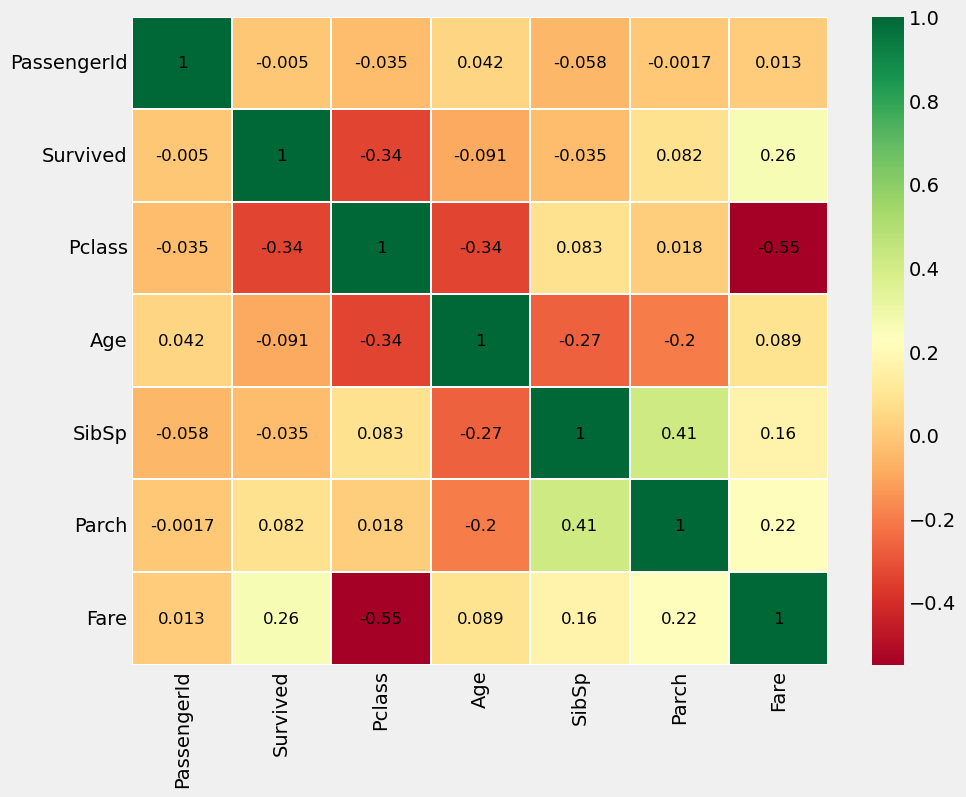

In [121]:
sns.heatmap(data.select_dtypes(include='number').corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={"size":12,"color":"black"})
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [122]:
#Ageをカテゴリカルデータに変換
data['Age_band'] = 0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [123]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,count
Age_band,
1,382
2,325
0,104
3,69
4,11


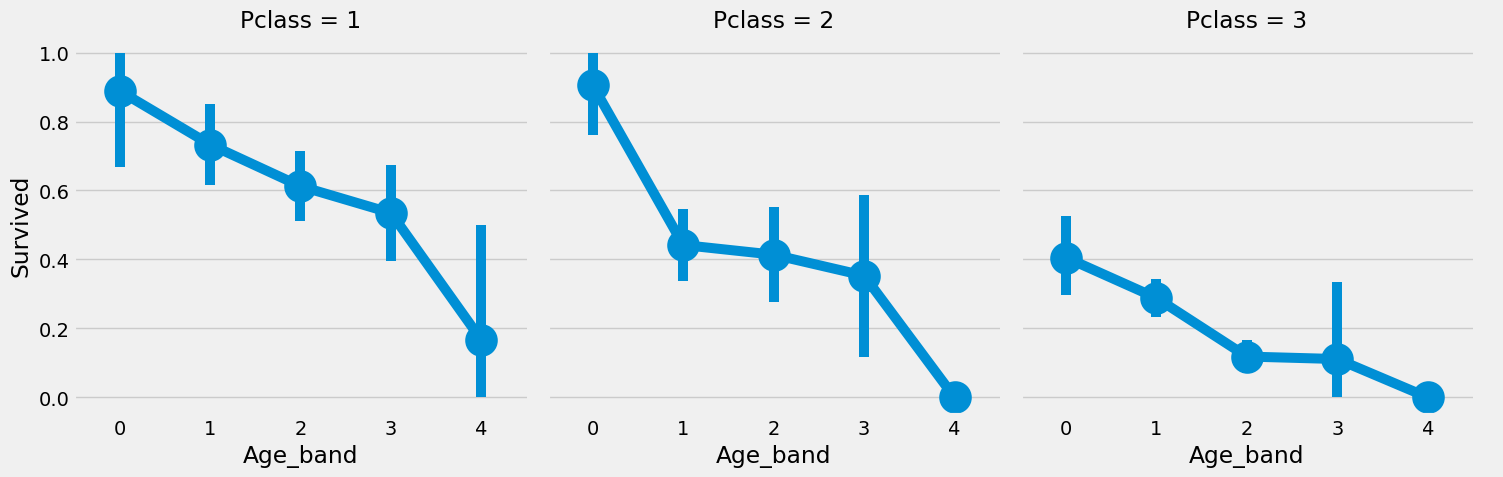

In [124]:
sns.catplot(x='Age_band',y='Survived',data=data,kind='point',col='Pclass')
plt.show()

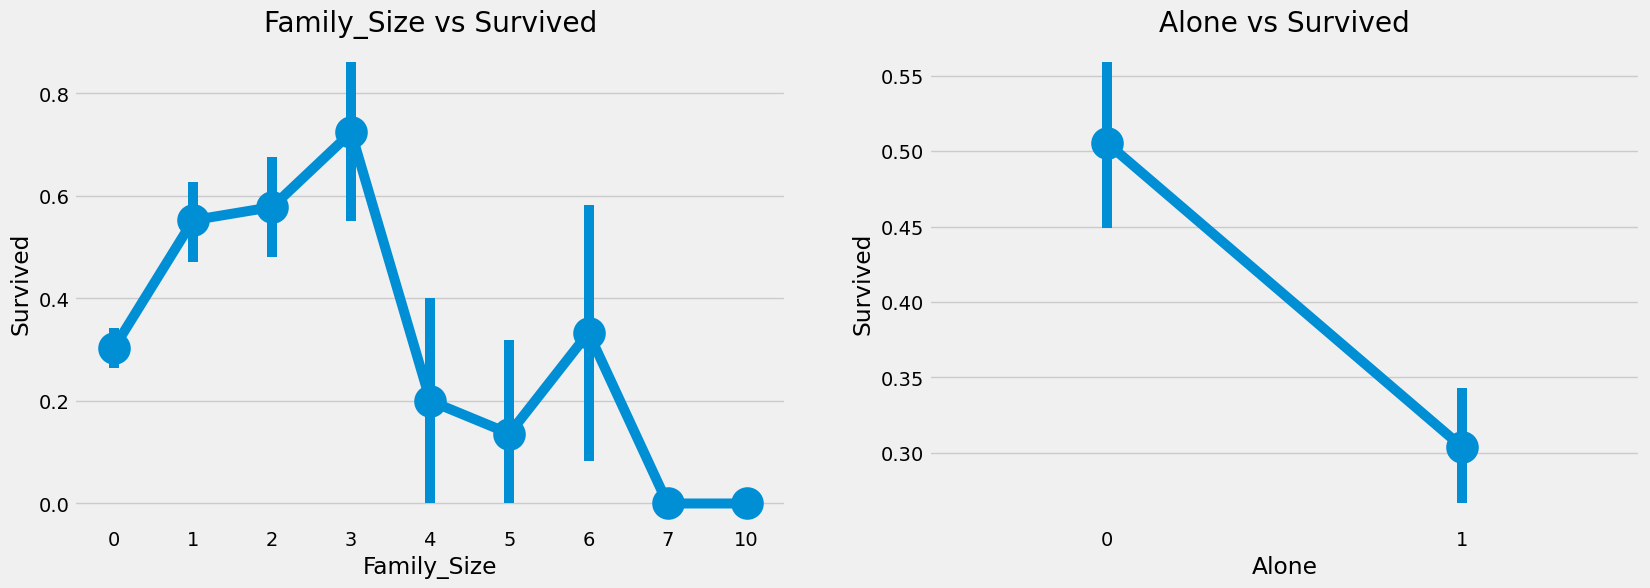

In [125]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch']+data['SibSp']
data['Alone'] = 0
data.loc[data['Family_Size']==0,'Alone'] = 1

f,ax = plt.subplots(1,2,figsize=(18,6))
sns.pointplot(x='Family_Size',y='Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.pointplot(x='Alone',y='Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.show()

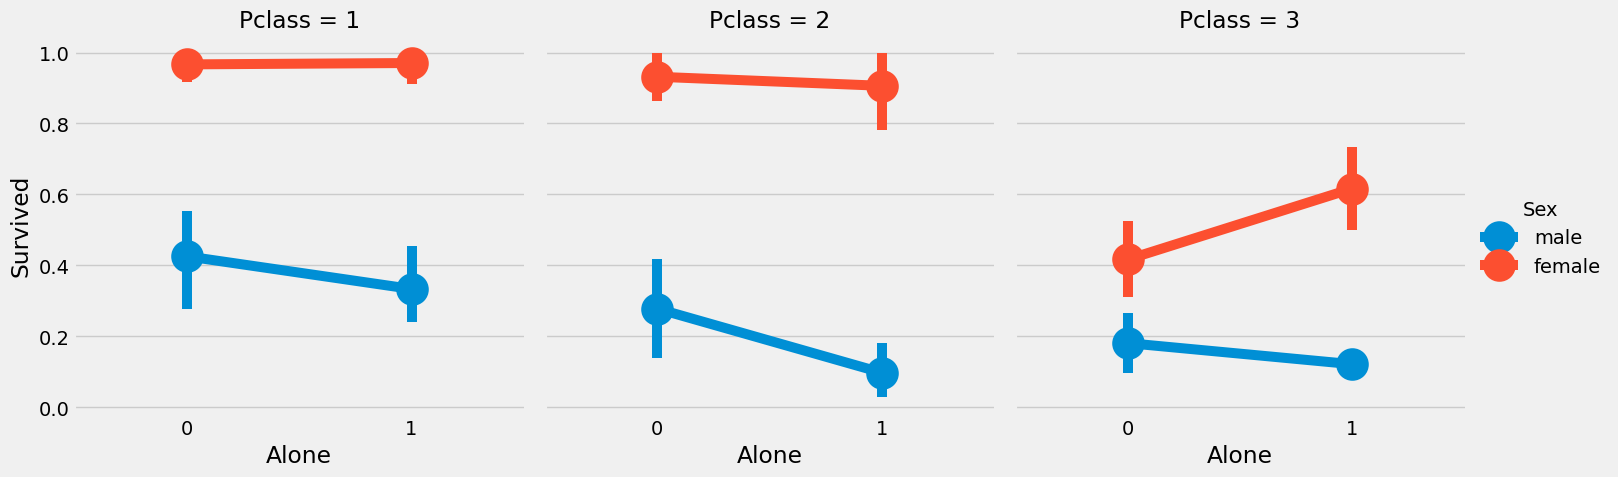

In [126]:
sns.catplot(x='Alone',y='Survived',data=data,hue='Sex',col='Pclass',kind='point')
plt.show()

In [127]:
data['Fare_Range'] = pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [128]:
#Fareをカテゴリカルデータに変換
data['Fare_cat'] = 0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

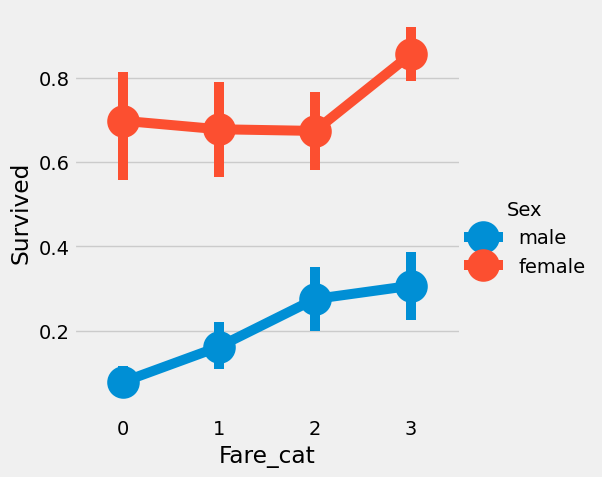

In [129]:
sns.catplot(x='Fare_cat',y='Survived',data=data,hue='Sex',kind='point')
plt.show()

In [130]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [131]:
data.drop(['Name','Age','Ticket','Cabin','Fare','Fare_Range','PassengerId'],axis=1,inplace=True)

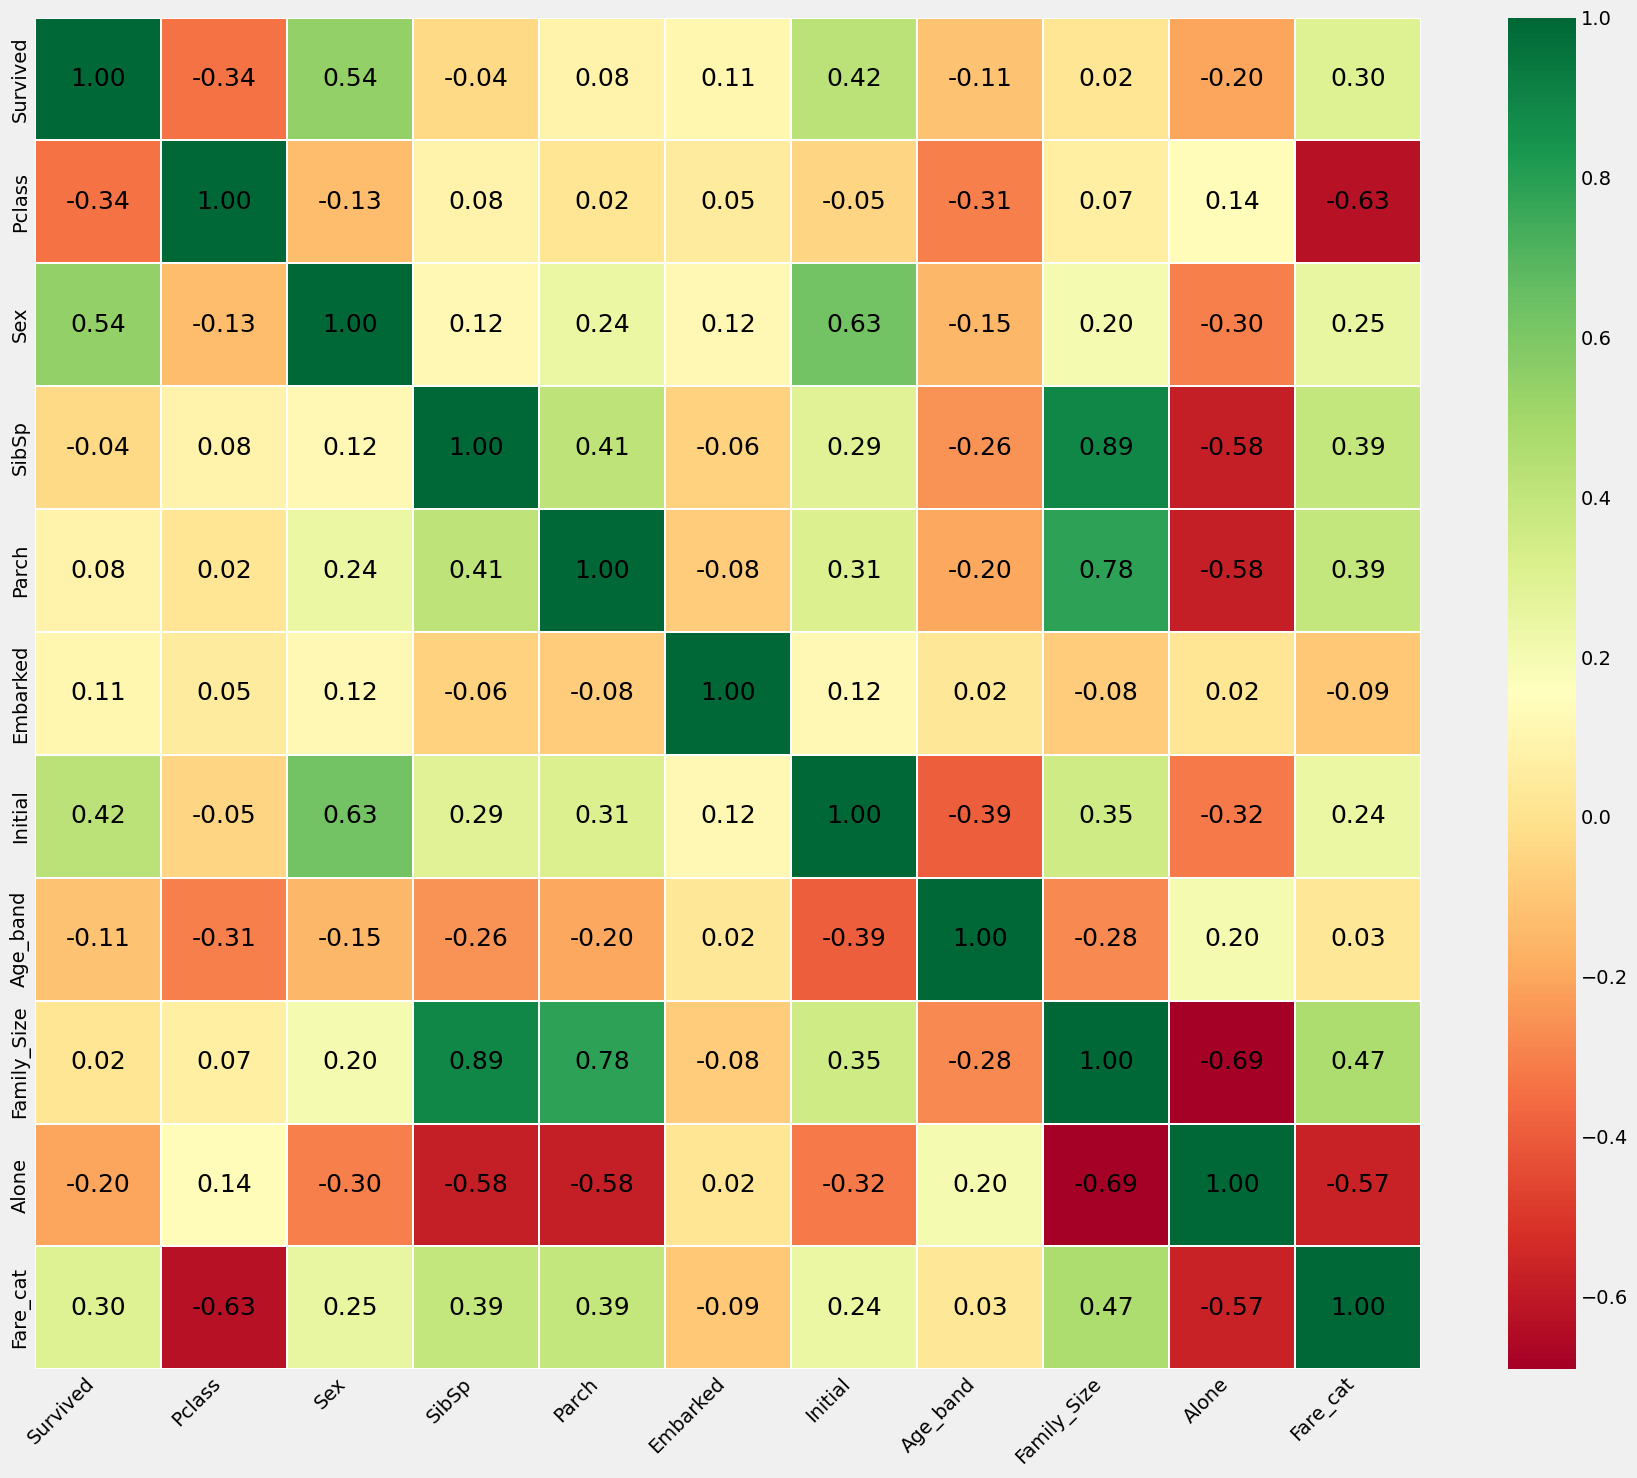

In [132]:
df_num = data.select_dtypes(include='number')

corr = df_num.corr().round(3)

plt.figure(figsize=(18,15))
sns.heatmap(corr,annot=corr,fmt='.2f',cmap='RdYlGn',linewidths=0.2,annot_kws={'size':18,'color':'black'})
plt.xticks(fontsize=14,rotation=45,ha='right')
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

In [133]:
sns.__version__

'0.13.2'

In [134]:
pip install seaborn==0.13.2

Note: you may need to restart the kernel to use updated packages.


In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [136]:
train,test = train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])

In [137]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
231,0,3,0,0,0,0,0,1,0,1,0
836,0,3,0,0,0,0,0,1,0,1,1
639,0,3,0,1,0,0,0,2,1,0,2
389,1,2,1,0,0,1,2,1,0,1,1
597,0,3,0,0,0,0,0,3,0,1,0


In [138]:
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data[data.columns[:1]]

In [139]:
#Radial Support Vector Machine
model = svm.SVC(kernel='rbf',gamma=0.1,C=1)
model.fit(train_X,train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is 0.835820895522388


In [140]:
#Linear Support Vector Machine
model = svm.SVC(kernel='linear',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.7985074626865671


In [141]:
#Logistic Regression
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3 = model.predict(test_X)
print('Accuracy for Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

Accuracy for Logistic Regression is 0.8134328358208955


In [142]:
#Decision Tree
model = DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4 = model.predict(test_X)
print('Accuracy for Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

Accuracy for Decision Tree is 0.8097014925373134


In [143]:
#K-Nearest Neighbors デフォルト値は５
model = KNeighborsClassifier()
model.fit(train_X,train_Y)
prediction5 = model.predict(test_X)
print('Accuracy for K-Nearest Neighbors is',metrics.accuracy_score(prediction5,test_Y))

Accuracy for K-Nearest Neighbors is 0.8134328358208955


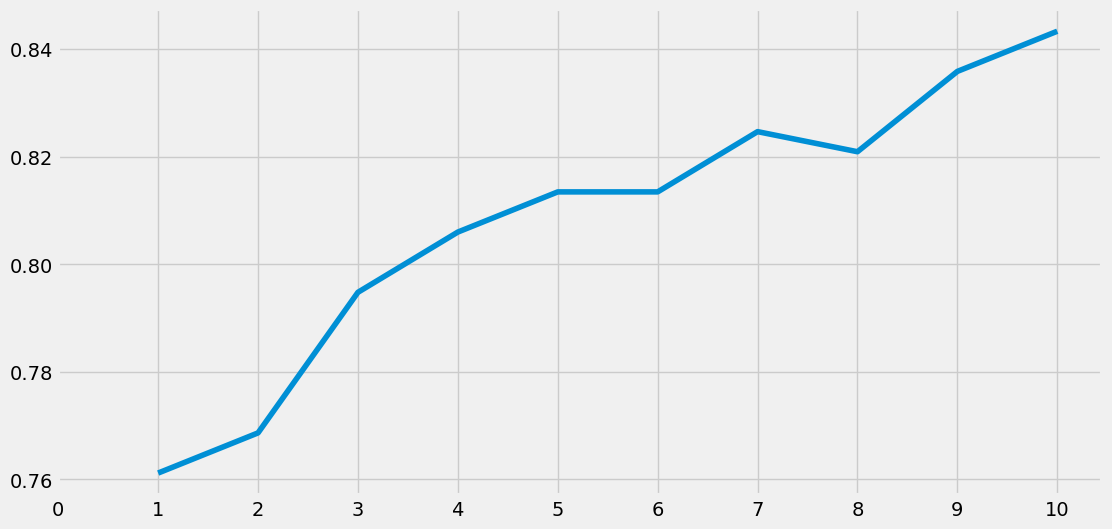

Accuracy for K-Nearest Neighbors is [0.76119403 0.76865672 0.79477612 0.80597015 0.81343284 0.81343284
 0.82462687 0.82089552 0.8358209  0.84328358] with the best accuracy of 0.8432835820895522


In [144]:
a_index = list(range(1,11))
a = []
x = [0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X,train_Y)
    prediction = model.predict(test_X)
    a.append(metrics.accuracy_score(prediction,test_Y))
a = pd.Series(a,index=a_index)
plt.figure(figsize=(12,6))
plt.plot(a_index,a)
plt.xticks(x)
plt.show()
print('Accuracy for K-Nearest Neighbors is',a.values,'with the best accuracy of',a.max())

In [145]:
#Gaussian Naive Bayes
model = GaussianNB()
model.fit(train_X,train_Y)
prediction6 = model.predict(test_X)
print('Accuracy for Gaussian Naive Bayes is',metrics.accuracy_score(prediction6,test_Y))

Accuracy for Gaussian Naive Bayes is 0.8134328358208955


In [146]:
#Random Forest
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7 = model.predict(test_X)
print('Accuracy for Random Forest is',metrics.accuracy_score(prediction7,test_Y))

Accuracy for Random Forest is 0.8208955223880597


In [147]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
kfold = KFold(n_splits=10,random_state=22,shuffle=True)
xyz = []
accuracy = []
std = []
classifiers = ['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']

models = [svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=10),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y,cv=kfold,scoring='accuracy')
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_data_frame2 = pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)
new_models_data_frame2

,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.804794,0.047530
Decision Tree,0.801373,0.046480
Naive Bayes,0.795843,0.054861
Random Forest,0.813758,0.053393


<Axes: >

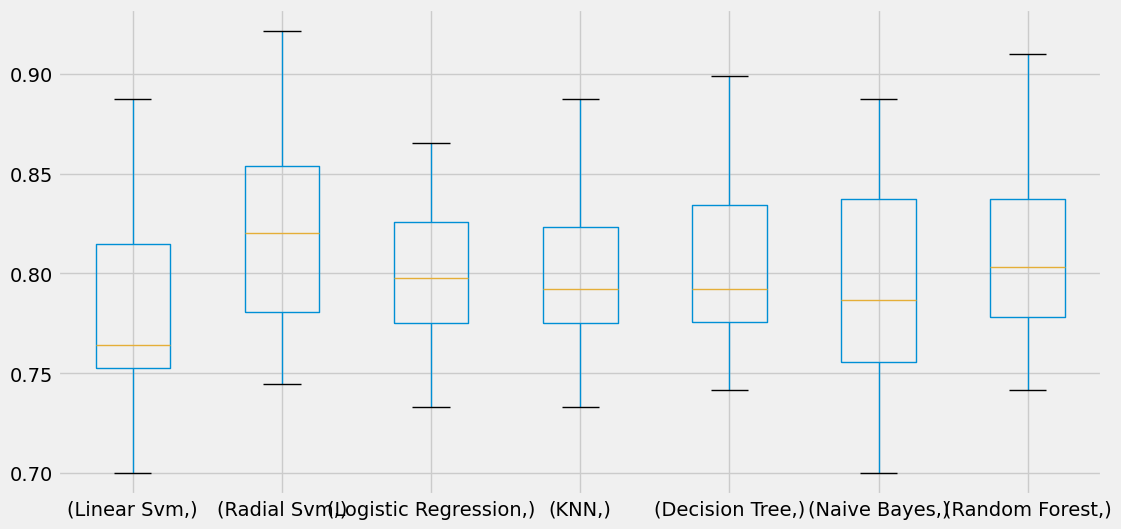

In [148]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

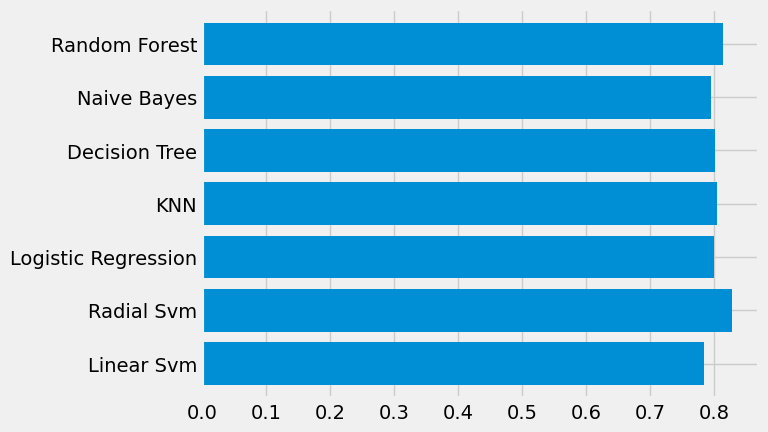

In [149]:
new_models_data_frame2['CV Mean'].plot.barh(width=0.8)
plt.figure(figsize=(8,5))
plt.title('Average CV Mean Accuracy')
plt.close()
plt.show()

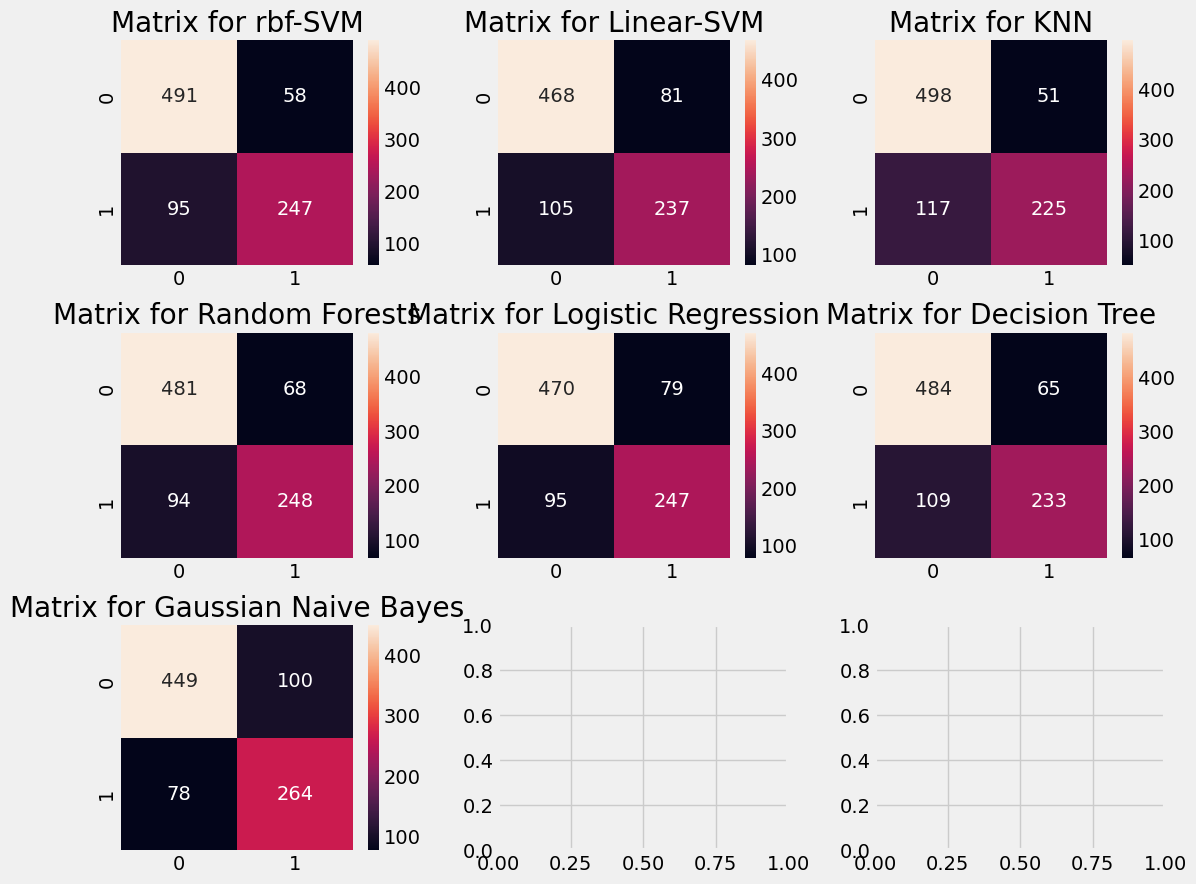

In [150]:
f,ax = plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=10),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Gaussian Naive Bayes')
plt.subplots_adjust(hspace=0.3,wspace=0.3)
plt.show()

In [151]:
#svm.SVCのGridSearchCV
from sklearn.model_selection import GridSearchCV
C = [0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel = ['rbf','linear']
hyper = {'kernel':kernel,'C':C,'gamma':gamma}
gd = GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(f'best score:{gd.best_score_}')
print(f'best estimator:{gd.best_estimator_}')

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
best score:0.8282593685267716
best estimator:SVC(C=0.4, gamma=0.3)


In [152]:
n_estimators = range(100,1000,100)
hyper = {'n_estimators':n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(f'best_score:{gd.best_score_}')
print(f'best_estimator:{gd.best_estimator_}')


Fitting 5 folds for each of 9 candidates, totalling 45 fits
best_score:0.82045069361622
best_estimator:RandomForestClassifier(n_estimators=400, random_state=0)


In [153]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
('RBF',svm.SVC(probability=True,kernel='rbf',C=0.3,gamma=0.3)),
('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
('LR',LogisticRegression(C=0.05)),
('DT',DecisionTreeClassifier(random_state=0)),
('NB',GaussianNB()),
('svm',svm.SVC(kernel='linear',probability=True))],voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross = cross_val_score(ensemble_lin_rbf,X,Y,cv=10,scoring='accuracy')
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8246268656716418
The cross validated score is 0.8260424469413234


In [154]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result = cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8137952559300874


In [155]:
model = BaggingClassifier(estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result = cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8160174781523096


In [156]:
#AdaBoosting
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result = cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8136828963795256


In [157]:
#GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result = cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


In [158]:
#XgBoost
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result = cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8182771535580524


In [159]:
learning_rate = [0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper = {
    'n_estimators':list(range(100,1100,100)),
    'learning_rate':learning_rate
}
gd = GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(f'The best score is:{gd.best_score_}')
print(f'The best estimator is:{gd.best_estimator_}')

Fitting 5 folds for each of 120 candidates, totalling 600 fits
The best score is:0.8293892411022534
The best estimator is:AdaBoostClassifier(learning_rate=0.4, n_estimators=800)


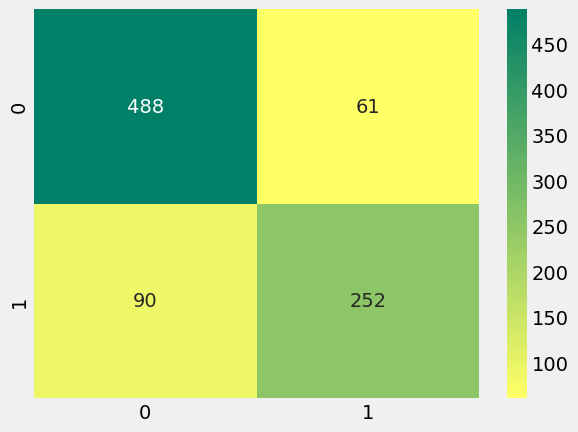

In [160]:
ada = AdaBoostClassifier(n_estimators=800,random_state=0,learning_rate=0.4)
result = cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='summer_r',annot=True,fmt='2.0f')
plt.show()

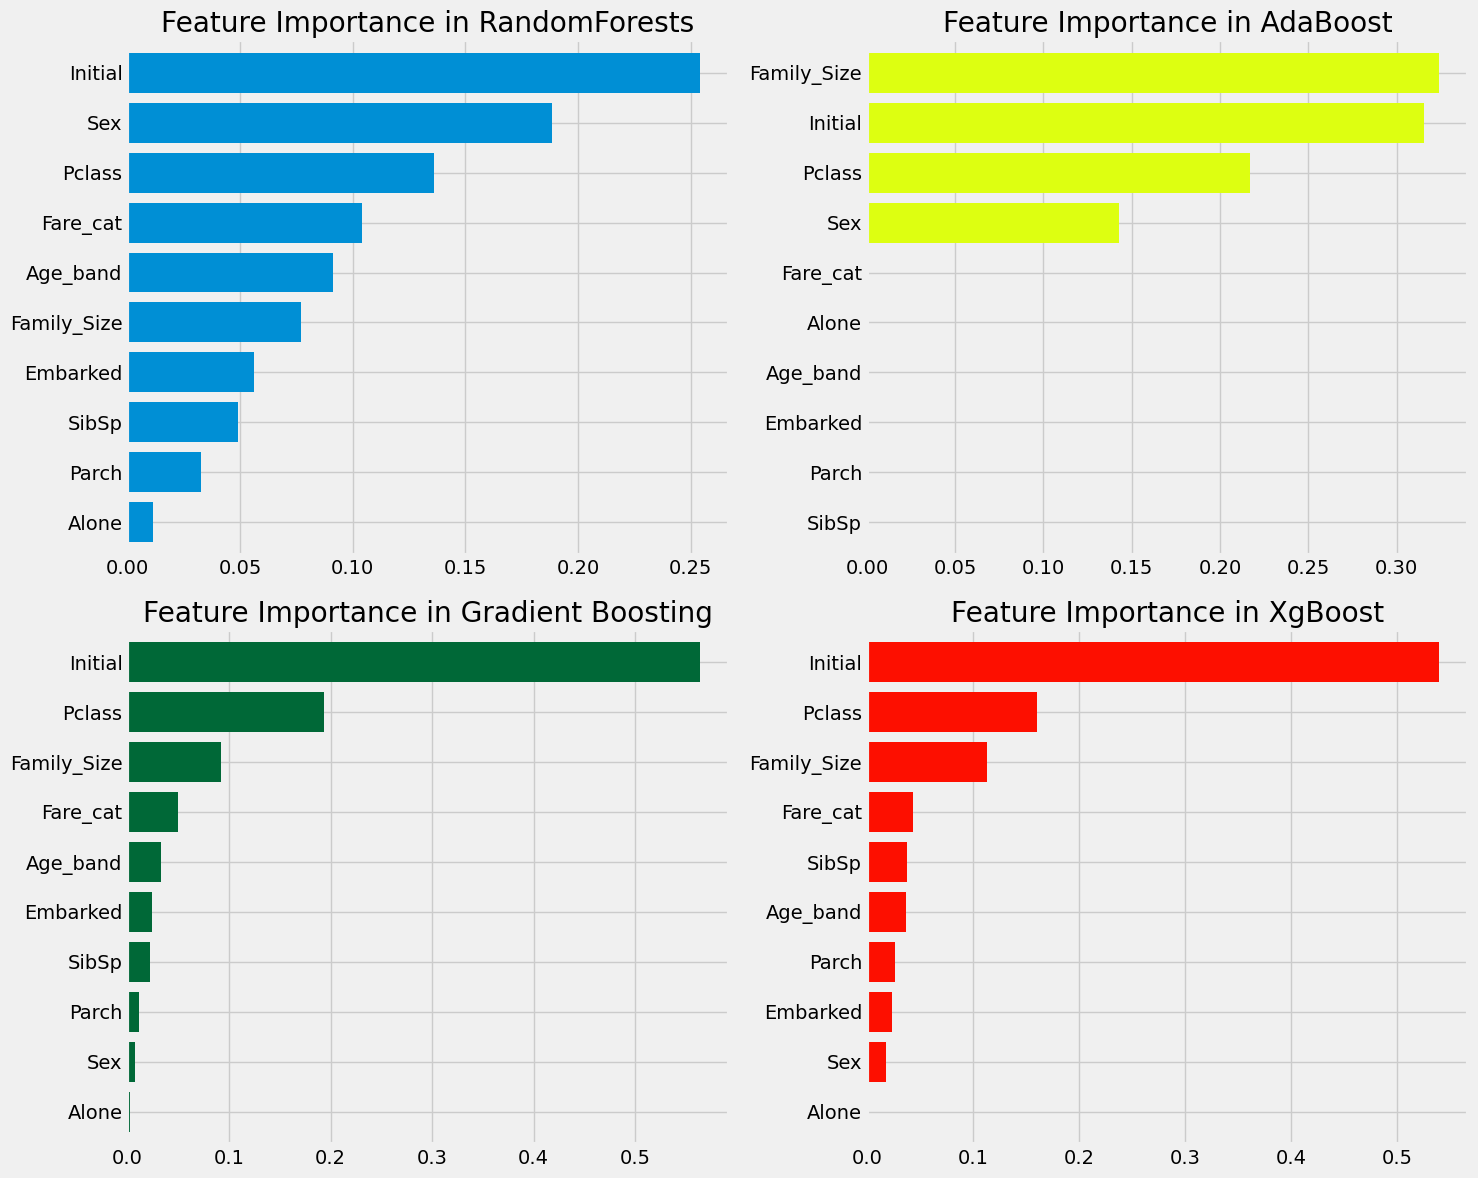

In [161]:
f,ax = plt.subplots(2,2,figsize=(15,12))
model = RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in RandomForests')
model = AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model = GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model = xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.tight_layout()
plt.show()